In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from SVM import BinarizedSVM

In [3]:
df = pd.read_csv('datasets/bupa.data',header=None)

In [4]:
df

,0,1,2,3,4,5,6
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2
...,...,...,...,...,...,...,...
340,99,75,26,24,41,12.0,1
341,96,69,53,43,203,12.0,2
342,98,77,55,35,89,15.0,1
343,91,68,27,26,14,16.0,1


In [5]:
df[6].value_counts()

2    200
1    145
Name: 6, dtype: int64

In [33]:
# trasformo le etichette da [1,2] a [-1,1]
y = df[6].apply(lambda x: 1 if x==2 else -1).values
# prendo solo le prime 6 colonne, che corrispondono a quelle delle feature
X = df.values[:,:6]

In [34]:
X = MinMaxScaler().fit_transform(X)

In [61]:
X.shape

(345, 6)

In [118]:
svm = BinarizedSVM(C=10, verbose=True)
svm.fit(X, y, max_iter=20)
y_pred = svm.predict(X)
accuracy_score(y, y_pred)

Nomi delle variabili: ['0', '1', '2', '3', '4', '5']
initializing F...
iteration 0----------------------------------------------------------------------------------------------------
scelgo le soglie per 0...
soglie trovate: b_plus:0.368421052631579	 b_minus:0.9999999999999998
	aggiungo soglia+ per 0...
scelgo le soglie per 1...
soglie trovate: b_plus:0.12173913043478263	 b_minus:0.3739130434782609
	aggiungo soglia+ per 1...
	aggiungo soglia- per 1...
scelgo le soglie per 2...
soglie trovate: b_plus:0.006622516556291393	 b_minus:0.9999999999999999
scelgo le soglie per 3...
soglie trovate: b_plus:0.14285714285714285	 b_minus:1.0000000000000002
	aggiungo soglia+ per 3...
scelgo le soglie per 4...
soglie trovate: b_plus:0.0547945205479452	 b_minus:1.0
	aggiungo soglia+ per 4...
scelgo le soglie per 5...
soglie trovate: b_plus:0.025	 b_minus:0.75
	aggiungo soglia- per 5...
iteration 1----------------------------------------------------------------------------------------------------
scelgo

0.5797101449275363

In [177]:
svm = BinarizedSVM(C=0.1, verbose=True)
svm.fit(X, y)
y_pred = svm.predict(X)
accuracy_score(y, y_pred)

Nomi delle variabili: ['0', '1', '2', '3', '4', '5']
initializing F...
iteration 0----------------------------------------------------------------------------------------------------
scelgo le soglie per 0...
soglie trovate: b_plus:0.368421052631579	 b_minus:0.9999999999999998
scelgo le soglie per 1...
soglie trovate: b_plus:0.12173913043478263	 b_minus:0.46956521739130436
	aggiungo soglia- per 1...
scelgo le soglie per 2...
soglie trovate: b_plus:0.006622516556291393	 b_minus:0.43708609271523174
scelgo le soglie per 3...
soglie trovate: b_plus:0.14285714285714285	 b_minus:1.0000000000000002
scelgo le soglie per 4...
soglie trovate: b_plus:0.0547945205479452	 b_minus:1.0
	aggiungo soglia+ per 4...
scelgo le soglie per 5...
soglie trovate: b_plus:0.025	 b_minus:0.75
iteration 1----------------------------------------------------------------------------------------------------
scelgo le soglie per 0...
soglie trovate: b_plus:0.368421052631579	 b_minus:0.9999999999999998
scelgo le soglie 

0.6521739130434783

In [170]:
sum(y_pred==-1)

242

In [171]:
scores = {}
for C in [0.001, 0.01, 0.1,0.5, 1,2,3,4,5,10,100,1000]:
    svm = BinarizedSVM(C=C, verbose=False)
    svm.fit(X, y)
    y_pred = svm.predict(X)
    scores[C] = accuracy_score(y, y_pred)

scores

{0.001: 0.5797101449275363,
 0.01: 0.5797101449275363,
 0.1: 0.6521739130434783,
 0.5: 0.4753623188405797,
 1: 0.518840579710145,
 2: 0.43768115942028984,
 3: 0.4463768115942029,
 4: 0.4318840579710145,
 5: 0.41739130434782606,
 10: 0.42028985507246375,
 100: 0.41739130434782606,
 1000: 0.41739130434782606}

In [64]:
scores

{1: 0.5797101449275363,
 10: 0.5797101449275363,
 100: 0.5797101449275363,
 1000: 0.5797101449275363,
 10000: 0.5797101449275363,
 1000000: 0.5797101449275363}

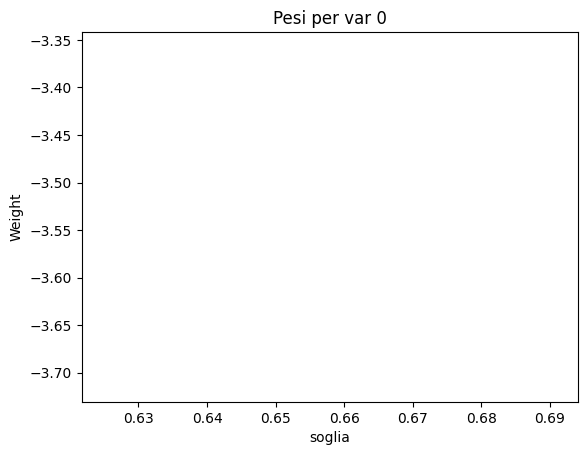

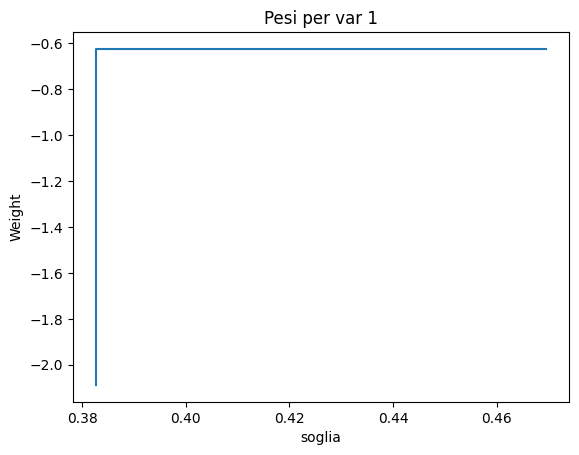

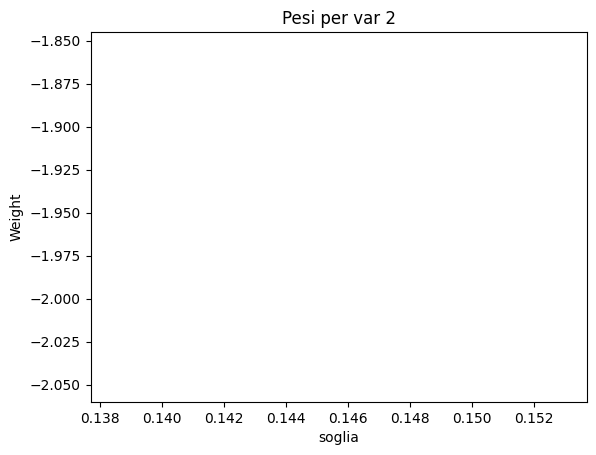

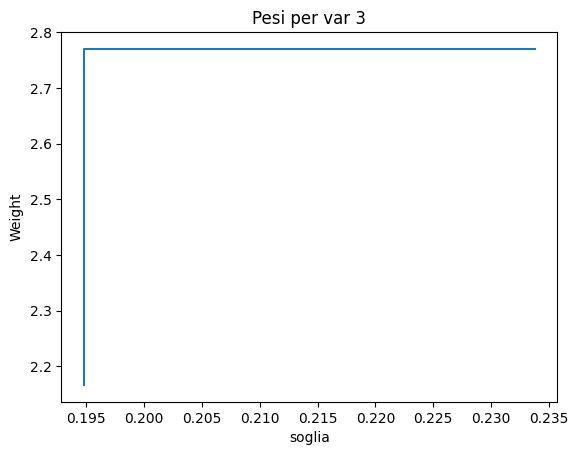

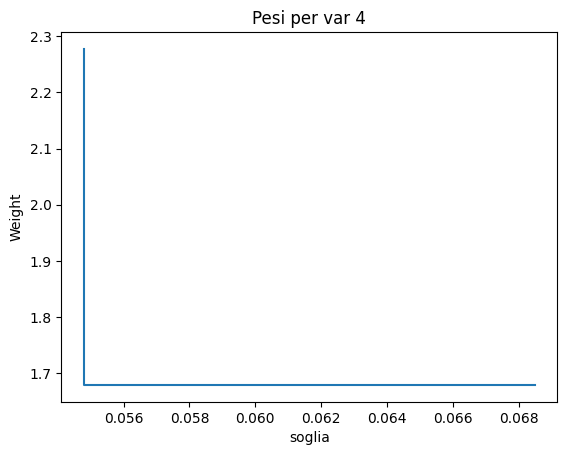

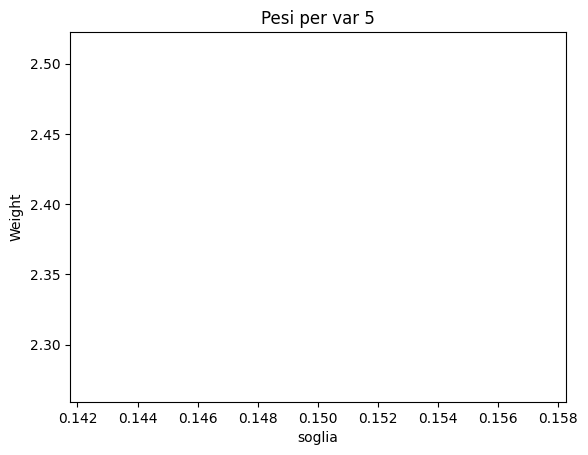

In [174]:
svm.visualizza_soglie()

In [41]:
from sklearn.svm import SVC

In [50]:
svc = SVC(C=1000000)
svc.fit(X, y)
accuracy_score(svc.predict(X), y)

0.991304347826087